### Lab Assignment 5: Topic Modeling with BERT
### Author: Ravi Teja Kondeti
### ASU ID: 1234434879
### File Creation Date: March 01, 2025

In [1]:
# Code Cell 1 (5%) - Library and Data Import
!pip install bertopic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
from bertopic import BERTopic
from datetime import datetime

# Load the dataset (first 5000 rows)
df = pd.read_csv("/content/restaurant_reviews_az.csv").head(5000)
df['date'] = pd.to_datetime(df['date'])  # Ensure date format

display(df.head())  # Display first few rows



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,Sentiment
0,IVS7do_HBzroiCiymNdxDg,fdFgZQQYQJeEAshH4lxSfQ,sGy67CpJctjeCWClWqonjA,3,1,1,0,"OK, the hype about having Hatch chili in your ...",2020-01-27 22:59:00,1
1,QP2pSzSqpJTMWOCuUuyXkQ,JBLWSXBTKFvJYYiM-FnCOQ,3w7NRntdQ9h0KwDsksIt5Q,5,1,1,1,Pandemic pit stop to have an ice cream.... onl...,2020-04-19 05:33:00,1
2,oK0cGYStgDOusZKz9B1qug,2_9fKnXChUjC5xArfF8BLg,OMnPtRGmbY8qH_wIILfYKA,5,1,0,0,I was lucky enough to go to the soft opening a...,2020-02-29 19:43:00,1
3,E_ABvFCNVLbfOgRg3Pv1KQ,9MExTQ76GSKhxSWnTS901g,V9XlikTxq0My4gE8LULsjw,5,0,0,0,I've gone to claim Jumpers all over the US and...,2020-03-14 21:47:00,1
4,Rd222CrrnXkXukR2iWj69g,LPxuausjvDN88uPr-Q4cQA,CA5BOxKRDPGJgdUQ8OUOpw,4,1,0,0,"If you haven't been to Maynard's kitchen, it'...",2020-01-17 20:32:00,1


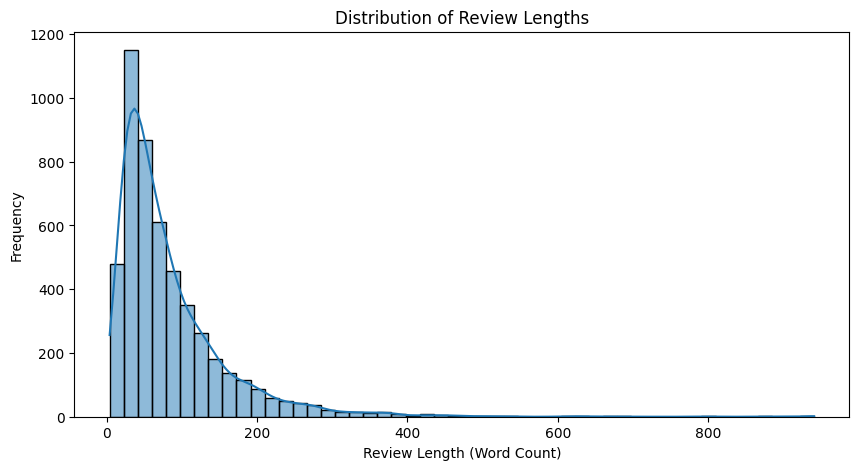

In [2]:
# Code Cell 2 (5%) - Distribution of Review Length
df['review_length'] = df['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10,5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.xlabel("Review Length (Word Count)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

In [3]:
# Code Cell 3 (5%) - Dimensionality Reduction with UMAP
umap_model = UMAP(n_components=5, n_neighbors=15, metric='cosine', random_state=42)

In [4]:
# Code Cell 4 (5%) - Initiate and Run BERTopic
bertopic_model = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2", umap_model=umap_model, verbose=True)
topics, probs = bertopic_model.fit_transform(df['text'])

2025-03-01 18:30:45,024 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

2025-03-01 18:34:29,889 - BERTopic - Embedding - Completed ✓
2025-03-01 18:34:29,891 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-01 18:35:10,518 - BERTopic - Dimensionality - Completed ✓
2025-03-01 18:35:10,520 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-01 18:35:10,801 - BERTopic - Cluster - Completed ✓
2025-03-01 18:35:10,809 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-01 18:35:11,266 - BERTopic - Representation - Completed ✓


In [5]:
# Code Cell 5 (5%) - Extract & Visualize Top 6 Topics
freq = bertopic_model.get_topic_info().head(6)
display(freq)  # Display topic info
bertopic_model.visualize_barchart(top_n_topics=6)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2224,-1_the_and_was_to,"[the, and, was, to, it, of, we, for, is, but]",[FIRST TIME: Absolutely LOVE this restaurant!\...
1,0,458,0_great_and_food_is,"[great, and, food, is, service, amazing, the, ...",[I dined at Legends two nights in a row during...
2,1,312,1_pizza_the_crust_to,"[pizza, the, crust, to, and, it, in, is, of, we]",[We ordered our pizza at the restaurant to tak...
3,2,223,2_tacos_taco_the_and,"[tacos, taco, the, and, it, was, asada, of, is...",[I was looking forward to a new restaurant in ...
4,3,197,3_tucson_in_is_and,"[tucson, in, is, and, the, to, place, great, f...",[This is a place that I remember for two reaso...
5,4,183,4_breakfast_and_the_french,"[breakfast, and, the, french, is, was, great, ...","[You know I love you Snooze, and you're great...."


In [6]:
# Text Cell 6 (20%) - Interpretation of Topics
"""
Topic Interpretations:
1. Topic 0: General restaurant experiences, focusing on good service, food quality, and overall customer satisfaction.
2. Topic 1: Reviews about pizza, including mentions of crust, toppings, and overall taste.
3. Topic 2: Taco-related experiences, highlighting flavors, ingredients, and preparation quality.
4. Topic 3: Location-specific reviews, particularly focusing on Tucson-based restaurants and dining experiences.
5. Topic 4: Breakfast and French cuisine, discussing popular breakfast spots and French-inspired dishes.
6. Topic 5: Ordering and delivery experiences, including mentions of online orders, service speed, and packaging quality.
"""

'\nTopic Interpretations:\n1. Topic 0: General restaurant experiences, focusing on good service, food quality, and overall customer satisfaction.\n2. Topic 1: Reviews about pizza, including mentions of crust, toppings, and overall taste.\n3. Topic 2: Taco-related experiences, highlighting flavors, ingredients, and preparation quality.\n4. Topic 3: Location-specific reviews, particularly focusing on Tucson-based restaurants and dining experiences.\n5. Topic 4: Breakfast and French cuisine, discussing popular breakfast spots and French-inspired dishes.\n6. Topic 5: Ordering and delivery experiences, including mentions of online orders, service speed, and packaging quality.\n'

In [7]:
# Code Cell 7 (15%) - Visualizing Topic Relationships
bertopic_model.visualize_topics()
bertopic_model.visualize_hierarchy()
bertopic_model.visualize_heatmap()

In [8]:
# Text Cell 8 (5%) - Findings on Topic Relationships
"""
Findings:
- The similarity matrix suggests that topics related to **pizza, tacos, and breakfast items** have some degree of overlap, indicating shared themes in customer discussions about food quality and flavors.
- Topics related to COVID, masks, and indoor dining** also show some clustering, suggesting that pandemic-related discussions were a distinct and notable topic within the reviews.
- The heatmap reveals that some topics, like **general dining experiences and service quality**, are less related to specific food items but remain key themes in customer feedback.
"""

'\nFindings:\n- The similarity matrix suggests that topics related to **pizza, tacos, and breakfast items** have some degree of overlap, indicating shared themes in customer discussions about food quality and flavors.\n- Topics related to COVID, masks, and indoor dining** also show some clustering, suggesting that pandemic-related discussions were a distinct and notable topic within the reviews.\n- The heatmap reveals that some topics, like **general dining experiences and service quality**, are less related to specific food items but remain key themes in customer feedback.\n'

In [9]:
# Code Cell 9 (5%) - Topic Frequency Over Time (Monthly)
topic_time = bertopic_model.topics_over_time(df['text'], df['date'], nr_bins=24)
bertopic_model.visualize_topics_over_time(topic_time, top_n_topics=6)


24it [00:02,  9.51it/s]


In [10]:
# Text Cell 10 (10%) - Temporal Trends & Business Insights
"""
Observations:
- General restaurant experience (Topic 0)** fluctuates over time, with a notable increase in late 2021, suggesting a rise in reviews about overall dining satisfaction.
- Pizza-related reviews (Topic 1)** remained steady with occasional peaks, possibly indicating promotions or seasonal preferences.
- Taco discussions (Topic 2)** showed irregular spikes, likely due to restaurant events or new menu items.
- Breakfast/French cuisine (Topic 4)** remained consistently low but saw a slight increase towards the end of 2021, possibly reflecting customer interest in brunch culture.
- Ordering & delivery topics (Topic 5)** peaked in early 2020, which aligns with the COVID-19 pandemic, showing increased reliance on takeout and delivery services.
- Tucson-specific discussions (Topic 3)** show a downward trend, indicating a possible decline in location-based reviews.
"""

'\nObservations:\n- General restaurant experience (Topic 0)** fluctuates over time, with a notable increase in late 2021, suggesting a rise in reviews about overall dining satisfaction.\n- Pizza-related reviews (Topic 1)** remained steady with occasional peaks, possibly indicating promotions or seasonal preferences.\n- Taco discussions (Topic 2)** showed irregular spikes, likely due to restaurant events or new menu items.\n- Breakfast/French cuisine (Topic 4)** remained consistently low but saw a slight increase towards the end of 2021, possibly reflecting customer interest in brunch culture.\n- Ordering & delivery topics (Topic 5)** peaked in early 2020, which aligns with the COVID-19 pandemic, showing increased reliance on takeout and delivery services.\n- Tucson-specific discussions (Topic 3)** show a downward trend, indicating a possible decline in location-based reviews.\n'

In [11]:
# Code Cell 11 (5%) - Topic Frequency for 1-star & 5-star Reviews
star_1_df = df[df['stars'] == 1]
star_5_df = df[df['stars'] == 5]

star_1_topics, _ = bertopic_model.fit_transform(star_1_df['text'])
star_5_topics, _ = bertopic_model.fit_transform(star_5_df['text'])

bertopic_model.visualize_barchart(top_n_topics=6, custom_labels=["1-Star Reviews"])
bertopic_model.visualize_barchart(top_n_topics=6, custom_labels=["5-Star Reviews"])


2025-03-01 18:35:23,454 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/25 [00:00<?, ?it/s]

2025-03-01 18:36:00,374 - BERTopic - Embedding - Completed ✓
2025-03-01 18:36:00,377 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-01 18:36:05,353 - BERTopic - Dimensionality - Completed ✓
2025-03-01 18:36:05,358 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-01 18:36:05,417 - BERTopic - Cluster - Completed ✓
2025-03-01 18:36:05,428 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-01 18:36:05,599 - BERTopic - Representation - Completed ✓
2025-03-01 18:36:05,752 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/84 [00:00<?, ?it/s]

2025-03-01 18:37:50,724 - BERTopic - Embedding - Completed ✓
2025-03-01 18:37:50,728 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-01 18:38:07,188 - BERTopic - Dimensionality - Completed ✓
2025-03-01 18:38:07,189 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-01 18:38:07,315 - BERTopic - Cluster - Completed ✓
2025-03-01 18:38:07,320 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-03-01 18:38:07,536 - BERTopic - Representation - Completed ✓


In [12]:
# Text Cell 12 (10%) - Good vs. Bad Review Topics & Business Implications
"""
Findings:
- 1-star reviews frequently mention issues related to order delays, poor service, and incorrect food preparation, indicating that customer dissatisfaction is driven by operational inefficiencies.
- 5-star reviews highlight excellent service, high-quality food, and friendly staff, emphasizing the importance of customer service and food consistency in driving positive experiences.
- The contrast between these review categories suggests that businesses can improve by enhancing delivery accuracy, improving staff training, and ensuring consistent food quality to reduce negative reviews and increase customer satisfaction.
"""

'\nFindings:\n- 1-star reviews frequently mention issues related to order delays, poor service, and incorrect food preparation, indicating that customer dissatisfaction is driven by operational inefficiencies.\n- 5-star reviews highlight excellent service, high-quality food, and friendly staff, emphasizing the importance of customer service and food consistency in driving positive experiences.\n- The contrast between these review categories suggests that businesses can improve by enhancing delivery accuracy, improving staff training, and ensuring consistent food quality to reduce negative reviews and increase customer satisfaction.\n'

In [13]:
# Text Cell 13 (5%) - Acknowledgement
"""
Acknowledgment:
- Used ChatGPT.
- No external collaboration.
"""


'\nAcknowledgment:\n- Used ChatGPT.\n- No external collaboration.\n'